In [5]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

#numpy torch torchvision matplotlib onnxruntime flask

In [6]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [8]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

100.0%


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100.0%


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100.0%


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100.0%


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100.0%


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



100.0%


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



100.0%


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



100.0%

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



In [12]:
dataiter = iter(trainloader)
# images, labels = dataiter.next()
images, labels = next(dataiter)


print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


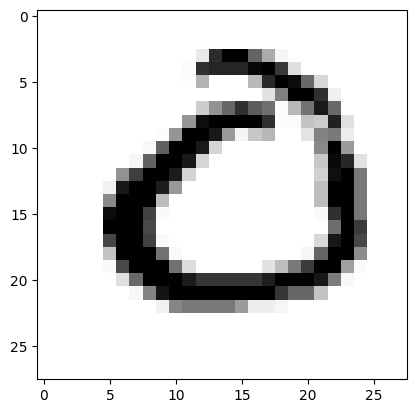

In [13]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

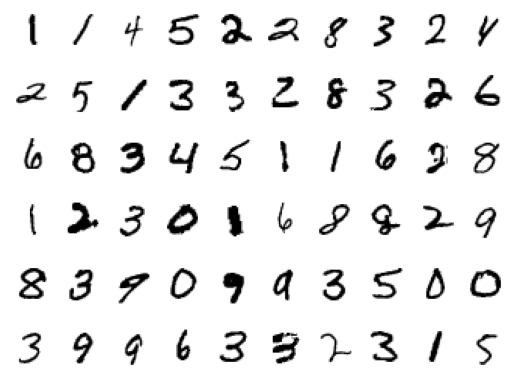

In [14]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [15]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [16]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [17]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 2.2709e-03,  2.2709e-03,  2.2709e-03,  ...,  2.2709e-03,
          2.2709e-03,  2.2709e-03],
        [ 5.8022e-03,  5.8022e-03,  5.8022e-03,  ...,  5.8022e-03,
          5.8022e-03,  5.8022e-03],
        [-4.4633e-03, -4.4633e-03, -4.4633e-03,  ..., -4.4633e-03,
         -4.4633e-03, -4.4633e-03],
        ...,
        [-7.4832e-04, -7.4832e-04, -7.4832e-04,  ..., -7.4832e-04,
         -7.4832e-04, -7.4832e-04],
        [-8.2285e-05, -8.2285e-05, -8.2285e-05,  ..., -8.2285e-05,
         -8.2285e-05, -8.2285e-05],
        [ 3.5991e-04,  3.5991e-04,  3.5991e-04,  ...,  3.5991e-04,
          3.5991e-04,  3.5991e-04]])


In [18]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.643921469908152
Epoch 1 - Training loss: 0.2785675177997999
Epoch 2 - Training loss: 0.21787364492967312
Epoch 3 - Training loss: 0.17733329001552006
Epoch 4 - Training loss: 0.1508885885078484
Epoch 5 - Training loss: 0.1293926017561447
Epoch 6 - Training loss: 0.11382434036888515
Epoch 7 - Training loss: 0.10058438625218453
Epoch 8 - Training loss: 0.09089026119170794
Epoch 9 - Training loss: 0.08327720168658267
Epoch 10 - Training loss: 0.0759049289411049
Epoch 11 - Training loss: 0.06943869941693141
Epoch 12 - Training loss: 0.06350939998577938
Epoch 13 - Training loss: 0.057813018415200666
Epoch 14 - Training loss: 0.05467476157361328

Training Time (in minutes) = 1.1188546299934388


In [22]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
# view_classify(img.view(1, 28, 28), ps)

Predicted Digit = 7


In [20]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9746


In [21]:
torch.save(model, './mnist_model.pt') 